In [1]:
%matplotlib inline

In [80]:
import scrapy
from scrapy.crawler import CrawlerProcess
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import json
import pytz
import seaborn as sns

# Jobs.bg job analysis
## Project Overview

### The goal of this analysis is to show any correlation between different fields in a job posting, so we can make a decision which is the most widely used job currently and most useded programming and non-programming skills

In [3]:
!scrapy crawl scraper_name.py

Scrapy 2.6.1 - no active project

Unknown command: crawl

Use "scrapy" to see available commands


### Navigate to folder

In [4]:
cd '/Users/dilyanyordanov/Documents/Softuni_AI/TEST/project/jobscraper/'

/Users/dilyanyordanov/Documents/Softuni_AI/TEST/project/jobscraper


### Data

### Dataset Description
#### The dataset used in this analysis was obtained by scraping www.jobs.bg It contains information about job postings such as: job website, position name, date of postage, , company name, number of non IT employees as well as number of IT employees, location, date of establishment, work from home option as well as different programming and non-programming skill set.

In [5]:
!scrapy crawl scraper_name | tail -n 10

2023-03-15 11:55:35 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: jobscraper)
2023-03-15 11:55:35 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.14, cssselect 1.1.0, parsel 1.6.0, w3lib 1.21.0, Twisted 22.2.0, Python 3.9.12 (main, Apr  5 2022, 01:53:17) - [Clang 12.0.0 ], pyOpenSSL 21.0.0 (OpenSSL 1.1.1o  3 May 2022), cryptography 3.4.8, Platform macOS-10.16-x86_64-i386-64bit
2023-03-15 11:55:35 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'jobscraper',
 'DOWNLOAD_DELAY': 0.25,
 'NEWSPIDER_MODULE': 'jobscraper.spiders',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_MODULES': ['jobscraper.spiders'],
 'USER_AGENT': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) '
               'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 '
               'Safari/537.36'}
2023-03-15 11:55:35 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2023-03-15 11:55:35 [scrapy.extensions.telnet] INFO: Telnet Password: 252b9860245ea97a
2023-

2023-03-15 11:55:35 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56>
{'position': ['Solutions Consultant'], 'company_name': 'INFRAGISTICS BULGARIA EOOD', 'location': '', 'number_of_employees': ['\n           ', '\n            В България от 2007        '], 'established': '2007', 'todays_date': '15.03.23', 'date_posted': 'вчера', 'job_url': 'https://www.jobs.bg/job/6756257', 'work_from_home': ['Home Office Possible'], 'skills_list': ['Angular', 'React', 'C/C++', 'JavaScript', 'C#'], 'skills_no_img': ['BI']}
2023-03-15 11:55:35 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56>
{'position': ['Front-End Developer'], 'company_name': 'INFRAGISTICS BULGARIA EOOD', 'location': '', 'number_of_employees': ['\n           ', '\n            В България от 2007        '], 'established': '2007', 'todays_date': '15.03.23', 'date_posted': 'вчера', 'job_url': 'https://www.

2023-03-15 11:55:38 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=26>
{'position': ['Senior Data Engineer'], 'company_name': 'СИРМА ЕЙ АЙ ЕАД / Онтотекст', 'location': 'Русе', 'number_of_employees': ['\n           ', '\n            100 служители;\xa0        ', '\n           ', '\n            70 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 2001        '], 'established': '2001', 'todays_date': '15.03.23', 'date_posted': '16.03.22', 'job_url': 'https://www.jobs.bg/job/6172412', 'work_from_home': [], 'skills_list': ['Java', 'Scala', 'Python', 'Perl'], 'skills_no_img': ['ETL']}
2023-03-15 11:55:38 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=26>
{'position': ['Data Engineer'], 'company_name': 'СИРМА ЕЙ АЙ ЕАД / Онтотекст', 'location': 'София', 'number_of_employees': ['\n  

2023-03-15 11:55:38 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=26>
{'position': ['Embedded Linux Software Engineer'], 'company_name': 'EnduroSat AD', 'location': 'София', 'number_of_employees': ['\n           ', '\n            110 служители;\xa0        ', '\n           ', '\n            45 ИТ специалисти;\xa0        ', '\n           ', '\n            Основана 2015        '], 'established': '2015', 'todays_date': '15.03.23', 'date_posted': '31.08.21', 'job_url': 'https://www.jobs.bg/job/5869728', 'work_from_home': [], 'skills_list': ['Linux', 'C/C++', 'Python', 'FPGA'], 'skills_no_img': ['Shell Scripts']}
2023-03-15 11:55:38 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=26>
{'position': ['Low Level Embedded Linux Software Engineer'], 'company_name': 'EnduroSat AD', 'location': 'София', 'number_of_

2023-03-15 11:55:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=24> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:39 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=24>
{'position': ['Senior Python AWS Cloud Native Developer'], 'company_name': 'ЕПАМ Системс България ЕООД', 'location': 'София', 'number_of_employees': ['\n           ', '\n            400 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 2014        '], 'established': '2014', 'todays_date': '15.03.23', 'date_posted': '01.12.22', 'job_url': 'https://www.jobs.bg/job/6609974', 'work_from_home': [], 'skills_list': ['Python', 'AWS', 'DynamoDB', 'NoSQL', 'ElasticSearch', 'Terraform', 'Docker', 'PostgreSQL', 'SQL', 'MySQL', 'MongoDB'], 'skills_no_img': ''}
2023-03-15

2023-03-15 11:55:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=23> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:39 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=23>
{'position': ['NLP Engineer'], 'company_name': 'СИРМА ЕЙ АЙ ЕАД / Онтотекст', 'location': 'София', 'number_of_employees': ['\n           ', '\n            100 служители;\xa0        ', '\n           ', '\n            70 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 2001        '], 'established': '2001', 'todays_date': '15.03.23', 'date_posted': '22.12.22', 'job_url': 'https://www.jobs.bg/job/5829544', 'work_from_home': [], 'skills_list': ['Java', 'Python', 'Jenkins', 'Linux', 'Docker'], 'skills_no_img': ['Shell Scripts']}
2023-03-15 11:55:39 [scrapy.core.

2023-03-15 11:55:39 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=23>
{'position': ['Lead Python Web Developer'], 'company_name': 'ЕПАМ Системс България ЕООД', 'location': 'Пловдив', 'number_of_employees': ['\n           ', '\n            400 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 2014        '], 'established': '2014', 'todays_date': '15.03.23', 'date_posted': '01.12.22', 'job_url': 'https://www.jobs.bg/job/6609980', 'work_from_home': [], 'skills_list': ['Python', 'AWS', 'GCP', 'Azure'], 'skills_no_img': ''}
2023-03-15 11:55:39 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=23>
{'position': ['Software Engineer - Technical Services'], 'company_name': 'HyperScience EOOD', 'location': 'София', 'number_of_employees': ['\n           ', '\n            70 служители;\xa0 

2023-03-15 11:55:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=21> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:40 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=21>
{'position': ['Game Backend Engineer with PHP'], 'company_name': 'Evolution Bulgariа / Допамин ЕООД', 'location': 'София', 'number_of_employees': ['\n           ', '\n            200 служители;\xa0        ', '\n           ', '\n            В България от 2014        '], 'established': '2014', 'todays_date': '15.03.23', 'date_posted': '31.01.23', 'job_url': 'https://www.jobs.bg/job/6685664', 'work_from_home': [], 'skills_list': ['PHP', 'Java', 'C#', 'Python'], 'skills_no_img': ''}
2023-03-15 11:55:40 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.ph

2023-03-15 11:55:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=20> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:40 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=20>
{'position': ['Senior Backend Software Engineer - Go, Java, Kubernetes, VMware Carbon Black - Opportunity for Worki'], 'company_name': 'VMware Bulgaria', 'location': 'София', 'number_of_employees': ['\n           ', '\n            1700 служители;\xa0        ', '\n           ', '\n            В България от 2007        '], 'established': '2007', 'todays_date': '15.03.23', 'date_posted': '17.02.23', 'job_url': 'https://www.jobs.bg/job/6714593', 'work_from_home': [], 'skills_list': ['Golang', 'Java', 'Kubernetes', 'VMware', 'Python'], 'skills_no_img': ''}
2023-03-15 11:55:40 [scrapy.core

2023-03-15 11:55:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=19> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:40 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=19>
{'position': ['Senior Front End QA Engineer'], 'company_name': 'Via Engineering Bulgaria EOOD', 'location': 'София', 'number_of_employees': ['\n           ', '\n            30 служители;\xa0        ', '\n           ', '\n            30 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 2019        '], 'established': '2019', 'todays_date': '15.03.23', 'date_posted': '24.02.23', 'job_url': 'https://www.jobs.bg/job/6725600', 'work_from_home': [], 'skills_list': ['Python', 'Jira'], 'skills_no_img': ''}
2023-03-15 11:55:40 [scrapy.core.scraper] DEBUG: Scraped from

2023-03-15 11:55:40 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=19>
{'position': ['Business Analyst, Investment Management Solutions'], 'company_name': 'DataArt Europe Ltd', 'location': 'София', 'number_of_employees': ['\n           ', '\n            120 служители;\xa0        ', '\n           ', '\n            В България от 2016        '], 'established': '2016', 'todays_date': '15.03.23', 'date_posted': '21.02.23', 'job_url': 'https://www.jobs.bg/job/6719673', 'work_from_home': [], 'skills_list': ['MS SQL', 'SQL', 'Tableau', 'Jira', 'Confluence', 'Java', 'Python'], 'skills_no_img': ['Data Visualization']}
2023-03-15 11:55:40 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=19>
{'position': ['Junior Automation Quality Assurance Engineer'], 'company_name': 'EXPERIAN BULGARIA EAD', 'location': 'София', 

2023-03-15 11:55:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=17> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:41 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=17>
{'position': ['Associate Analytics Engineer'], 'company_name': 'EXPERIAN BULGARIA EAD', 'location': 'София', 'number_of_employees': ['\n           ', '\n            1050 служители;\xa0        ', '\n           ', '\n            500 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 2004        '], 'established': '2004', 'todays_date': '15.03.23', 'date_posted': '13.03.23', 'job_url': 'https://www.jobs.bg/job/6751111', 'work_from_home': [], 'skills_list': ['Python', 'SQL'], 'skills_no_img': ['ETL']}
2023-03-15 11:55:41 [scrapy.core.scraper] DEBUG: Scraped from 

2023-03-15 11:55:41 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=17>
{'position': ['Data Engineer'], 'company_name': 'COCA-COLA BULGARIA EOOD', 'location': 'София', 'number_of_employees': ['\n           ', '\n            200 служители;\xa0        ', '\n           ', '\n            180 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 1992        '], 'established': '1992', 'todays_date': '15.03.23', 'date_posted': '08.03.23', 'job_url': 'https://www.jobs.bg/job/6677420', 'work_from_home': ['Home Office Possible'], 'skills_list': ['Azure', 'Power BI', 'SQL', 'Python'], 'skills_no_img': ['ETL', 'Data Visualization', 'BI']}
2023-03-15 11:55:41 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=17>
{'position': ['Senior DevOps Engineer'], 'company_name': 'emerchantpay ood', 'locatio

2023-03-15 11:55:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=15> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=15>
{'position': ['Backend Developer (m/f/d)'], 'company_name': 'Евнисофт ЕООД', 'location': '', 'number_of_employees': [], 'established': None, 'todays_date': '15.03.23', 'date_posted': '24.02.23', 'job_url': 'https://www.jobs.bg/job/6727187', 'work_from_home': ['Home Office Possible', 'Online Interview'], 'skills_list': ['Python', 'PHP', 'Azure', 'AWS', 'Docker', 'Kubernetes', 'SQL', 'NoSQL'], 'skills_no_img': ''}
2023-03-15 11:55:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=15>
{'positio

2023-03-15 11:55:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=14> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=14>
{'position': ['Data Operations Specialist'], 'company_name': 'PAL Recruitment Ltd.', 'location': 'София', 'number_of_employees': ['\n           ', '\n            Основана 2022        '], 'established': '2022', 'todays_date': '15.03.23', 'date_posted': '07.03.23', 'job_url': 'https://www.jobs.bg/job/6743253', 'work_from_home': ['Home Office Possible'], 'skills_list': ['SPSS', 'VBA', 'Python'], 'skills_no_img': ['Shell Scripts']}
2023-03-15 11:55:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&pa

2023-03-15 11:55:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=13> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=13>
{'position': ['Senior Python Developer'], 'company_name': 'SIT Rolos Bulgaria Ltd.', 'location': 'София', 'number_of_employees': ['\n           ', '\n            30 служители;\xa0        ', '\n           ', '\n            25 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 2022        '], 'established': '2022', 'todays_date': '15.03.23', 'date_posted': '10.03.23', 'job_url': 'https://www.jobs.bg/job/6749658', 'work_from_home': ['Home Office Possible', 'Online Interview'], 'skills_list': ['Python', 'RabbitMQ', 'Redis', 'NoSQL', 'PostgreSQL', 'SQL', 'Kubernet

2023-03-15 11:55:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=12> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=12>
{'position': ['Senior Python Developer'], 'company_name': 'Рекрутмънт фотос и видеос БГ ЕООД', 'location': 'София', 'number_of_employees': [], 'established': None, 'todays_date': '15.03.23', 'date_posted': '23.02.23', 'job_url': 'https://www.jobs.bg/job/6725262', 'work_from_home': ['Home Office Possible', 'Online Interview'], 'skills_list': ['Python', 'Docker', 'Kubernetes', 'Ansible'], 'skills_no_img': ''}
2023-03-15 11:55:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=12>
{'position': [

2023-03-15 11:55:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=11> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:43 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=11>
{'position': ['Senior QA (Automation) Engineer'], 'company_name': 'H2H Ltd.', 'location': 'София', 'number_of_employees': [], 'established': None, 'todays_date': '15.03.23', 'date_posted': 'вчера', 'job_url': 'https://www.jobs.bg/job/6755124', 'work_from_home': ['Home Office Possible', 'Online Interview'], 'skills_list': ['Английски', 'Selenium', 'Java', 'C#', 'Python', 'Active Directory', 'Windows'], 'skills_no_img': ''}
2023-03-15 11:55:43 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=11>

2023-03-15 11:55:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=10> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:43 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=10>
{'position': ['C++ Software Engineer'], 'company_name': 'Пи Еф Джи България ЕООД', 'location': '', 'number_of_employees': ['\n           ', '\n            18 служители;\xa0        ', '\n           ', '\n            Основана 2010        '], 'established': '2010', 'todays_date': '15.03.23', 'date_posted': '06.03.23', 'job_url': 'https://www.jobs.bg/job/6738023', 'work_from_home': ['Home Office Possible', 'Online Interview'], 'skills_list': ['C/C++', 'Python', 'React', 'Windows'], 'skills_no_img': ''}
2023-03-15 11:55:43 [scrapy.core.scraper] ERROR: Spider error processing <GET https://

2023-03-15 11:55:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=8> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:44 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=8>
{'position': ['DATA ENGINEER (AWS)'], 'company_name': 'Godel Technologies Europe EOOD', 'location': 'София', 'number_of_employees': ['\n           ', '\n            35 служители;\xa0        ', '\n           ', '\n            33 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 2021        '], 'established': '2021', 'todays_date': '15.03.23', 'date_posted': '06.03.23', 'job_url': 'https://www.jobs.bg/job/6739541', 'work_from_home': ['Home Office Possible', 'Online Interview'], 'skills_list': ['AWS', 'Python', 'SharePoint', 'Windows', 'Confluence'], 'skills_no_i

2023-03-15 11:55:44 [scrapy.core.scraper] ERROR: Spider error processing <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=8> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
Traceback (most recent call last):
  File "/Users/dilyanyordanov/opt/anaconda3/lib/python3.9/site-packages/scrapy/utils/defer.py", line 132, in iter_errback
    yield next(it)
  File "/Users/dilyanyordanov/opt/anaconda3/lib/python3.9/site-packages/scrapy/utils/python.py", line 354, in __next__
    return next(self.data)
  File "/Users/dilyanyordanov/opt/anaconda3/lib/python3.9/site-packages/scrapy/utils/python.py", line 354, in __next__
    return next(self.data)
  File "/Users/dilyanyordanov/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/spidermw.py", line 66, in _evaluate_iterable
    for r in iterable:
  File "/Users/dilyanyordanov/opt/anaconda3/lib/python3.9/site-packages/scrapy/spidermiddlewares/offsite.py", line 29, in pro

2023-03-15 11:55:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=6> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:44 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=6>
{'position': ['Rookie to Software Engineer Rockstar'], 'company_name': 'MentorMate Bulgaria Ltd.', 'location': 'Пловдив', 'number_of_employees': ['\n           ', '\n            800 служители;\xa0        ', '\n           ', '\n            850 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 2006        '], 'established': '2006', 'todays_date': '15.03.23', 'date_posted': '09.03.23', 'job_url': 'https://www.jobs.bg/job/6743441', 'work_from_home': ['Home Office Possible', 'Online Interview'], 'skills_list': ['Spark', 'Power BI', 'Tableau', 'AWS', 'Azure', 'Pytho

2023-03-15 11:55:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=5> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=5>
{'position': ['Penetration Tester'], 'company_name': 'PricewaterhouseCoopers Bulgaria Ltd', 'location': 'София', 'number_of_employees': [], 'established': None, 'todays_date': '15.03.23', 'date_posted': '16.02.23', 'job_url': 'https://www.jobs.bg/job/6714098', 'work_from_home': ['Home Office Possible', 'Online Interview'], 'skills_list': ['Python', 'Linux', 'Windows', 'C/C++', 'C#', 'Java', '.NET', 'ASP.NET', 'PHP', 'Node.js', 'Docker'], 'skills_no_img': ['Pentesting', 'Shell Scripts', 'CEH']}
2023-03-15 11:55:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_

2023-03-15 11:55:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=4> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=4>
{'position': ['DEVOPS DATABASE CLOUD ENGINEER'], 'company_name': 'Schwarz Global Services Bulgaria EOOD', 'location': 'София', 'number_of_employees': ['\n           ', '\n            450 служители;\xa0        ', '\n           ', '\n            430 ИТ специалисти;\xa0        ', '\n           ', '\n            Основана 2020        '], 'established': '2020', 'todays_date': '15.03.23', 'date_posted': '24.02.23', 'job_url': 'https://www.jobs.bg/job/6726180', 'work_from_home': ['Home Office Possible', 'Online Interview'], 'skills_list': ['Linux', 'OpenStack', 'Kubernetes', 'PostgreSQL', 'SQL

2023-03-15 11:55:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=3> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=3>
{'position': ['Automation QA specialist (WEB) | Stay at Home recruitment process'], 'company_name': 'DHL Freight Enterprise Software Solutions / DHL Logistics Bulgaria Ltd', 'location': 'София', 'number_of_employees': ['\n           ', '\n            60 служители;\xa0        ', '\n           ', '\n            60 ИТ специалисти;\xa0        ', '\n           ', '\n            В България от 2017        '], 'established': '2017', 'todays_date': '15.03.23', 'date_posted': '06.03.23', 'job_url': 'https://www.jobs.bg/job/6738313', 'work_from_home': ['Home Office Possible', 'Online Interview'],

2023-03-15 11:55:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=2> (referer: https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56)
2023-03-15 11:55:46 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=2>
{'position': ['Electronic System Test Engineer'], 'company_name': 'ЛИБХЕР - ХАУСГЕРЕТЕ МАРИЦА ЕООД', 'location': 'Радиново', 'number_of_employees': ['\n           ', '\n            В България от 2000        '], 'established': '2000', 'todays_date': '15.03.23', 'date_posted': '08.03.23', 'job_url': 'https://www.jobs.bg/job/6745212', 'work_from_home': ['Home Office Possible'], 'skills_list': ['Английски', 'Немски', 'Python', 'Jira', 'Confluence'], 'skills_no_img': ''}
2023-03-15 11:55:46 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&catego

2023-03-15 11:55:46 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=2>
{'position': ['Customer Analytics Data Scientist Manager'], 'company_name': 'PricewaterhouseCoopers Bulgaria Ltd', 'location': 'София', 'number_of_employees': [], 'established': None, 'todays_date': '15.03.23', 'date_posted': '06.03.23', 'job_url': 'https://www.jobs.bg/job/6740207', 'work_from_home': ['Online Interview'], 'skills_list': ['Python', 'SPSS', 'Ruby', 'Hadoop', 'SQL', 'AWS', 'GCP', 'Docker'], 'skills_no_img': ''}
2023-03-15 11:55:46 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.jobs.bg/front_job_search.php?subm=1&categories%5B0%5D=56&techs%5B0%5D=Python&page=2>
{'position': ['Embedded Software Test Engineer'], 'company_name': 'одело България ЕООД', 'location': 'София', 'number_of_employees': ['\n           ', '\n            500 служители;\xa0        ', '\n           ', '\n            В България от 20

In [6]:
# Reading the json data
df = pd.read_json("items.json")

### Some key features in the dataset include:
- 'position': Title of the job position
- 'company_name': Name of the employeer
- 'location': Location of the company
- 'number_of_employees': Total number of employees
- 'established': Year of establishment
- 'todays_date': Today's date
- 'date_posted': Date when the job posting was created
- 'job_url': A link to the job posting
- 'work_from_home': Work from home option (Home OFfice Possible, Online Interview)
- 'skills_list': A list of the programming tech stack required for the position
- 'skills_no_img': A list of the non programming tech stack required for the position

In [7]:
df.head(5)

,position,company_name,location,number_of_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img
0,[PHP Developer],Хемисфиър Комърс ЕООД,София,"[\n , \n 25 служители; ...",2014.0,15.03.23,днес,https://www.jobs.bg/job/6757601,"[Home Office Possible, Online Interview]","[PHP, MySQL, SQL, Symfony, Laravel, Linux]",
1,[Консултант Клиентски Запитвания по Чат и Имей...,ЕЙЧ АР ЕС БЪЛГАРИЯ ЕООД,Пловдив,"[\n , \n В България от 20...",2012.0,15.03.23,днес,https://www.jobs.bg/job/6757608,[],"[Английски, Италиански]",
2,[Quality Assurance Engineer],Trading 212 EOOD,София,"[\n , \n В България от 20...",2003.0,15.03.23,днес,https://www.jobs.bg/job/6757531,"[Home Office Possible, Online Interview]","[SQL, JavaScript, HTML/CSS, Linux]",
3,[Dashboard Application SW Developer],ФЕСТО ПРОИЗВОДСТВО ЕООД,София,[],NaN,15.03.23,днес,https://www.jobs.bg/job/6756917,"[Home Office Possible, Online Interview]","[Kubernetes, Node.js, Grafana, TypeScript]",
4,[Application and Platform Software Test Engineer],ФЕСТО ПРОИЗВОДСТВО ЕООД,София,[],NaN,15.03.23,днес,https://www.jobs.bg/job/6756999,"[Home Office Possible, Online Interview]","[C#, .NET, Python, Selenium]",


## Data Cleaning

In [8]:
# Let's check how many columns and rows do we have
df.shape

(475, 11)

In [9]:
# Get the current UTC time
current_utc_time = datetime.now(pytz.utc)

In [10]:
# Replace occurrences of "днес" and "вчера" with corresponding dates
df['date_posted'] = df.apply(lambda x: x['todays_date'] if x['date_posted'] == "днес" else x['date_posted'], axis=1)
df['date_posted'] = df['date_posted'].apply(lambda x:
                                            (current_utc_time - timedelta(days=1)).strftime("%d.%m.%y")
                                            if x == 'вчера' else x)

In [11]:
# Convert 'todays_date' and 'date_posted' columns to datetime format with the correct date format
df['todays_date'] = pd.to_datetime(df['todays_date'], format='%d.%m.%y')
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%d.%m.%y')

In [12]:
df.tail()

,position,company_name,location,number_of_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img
470,[AI Developer with Python (Junior/Mid Level)],Aifnet Ltd,София Заплата,[],NaN,2023-03-15,2023-03-06,https://www.jobs.bg/job/6715029,[],"[Python, PyTorch, Docker, Linux]",
471,[Embedded SW Senior Test Engineer],ЛЕМ България ЕООД,София,"[\n , \n В България от 20...",2013.0,2023-03-15,2023-03-06,https://www.jobs.bg/job/6740244,[Home Office Possible],"[Python, C/C++, Pandas]","[Switching, ASPICE]"
472,[Embedded Software Engineer],ЛЕМ България ЕООД,София,"[\n , \n В България от 20...",2013.0,2023-03-15,2023-03-06,https://www.jobs.bg/job/6740204,"[Home Office Possible, Online Interview]","[C/C++, Python]","[Switching, ASPICE]"
473,[Customer Analytics Data Scientist Manager],PricewaterhouseCoopers Bulgaria Ltd,София,[],NaN,2023-03-15,2023-03-06,https://www.jobs.bg/job/6740207,[Online Interview],"[Python, SPSS, Ruby, Hadoop, SQL, AWS, GCP, Do...",
474,[Embedded Software Test Engineer],одело България ЕООД,София,"[\n , \n 500 служители; ...",2018.0,2023-03-15,2023-03-06,https://www.jobs.bg/job/6739738,"[Home Office Possible, Online Interview]","[C/C++, C#, Python, Jira]",


In [13]:
# Let's check the types of variables of our columns
df.dtypes

position                       object
company_name                   object
location                       object
number_of_employees            object
established                   float64
todays_date            datetime64[ns]
date_posted            datetime64[ns]
job_url                        object
work_from_home                 object
skills_list                    object
skills_no_img                  object
dtype: object

In [14]:
# Let's use regex to find any brackets in column "position" [] and replace them with blanks
df['position'] = df['position'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]',  '').str.replace("'", '')

/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_68093/556262424.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['position'] = df['position'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]',  '').str.replace("'", '')


In [15]:
# Checking for null values in the dataset
df.isna().sum()

position                0
company_name            0
location                0
number_of_employees     0
established            87
todays_date             0
date_posted             0
job_url                 0
work_from_home          0
skills_list             0
skills_no_img           0
dtype: int64

In [16]:
# Changes the type of column "position" to string
df['position'] = df['position'].astype(str)

In [17]:
# Let's use regex to find any brackets [] and replace them with blanks
df['work_from_home'] = df['work_from_home'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')

/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_68093/890940726.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['work_from_home'] = df['work_from_home'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')


In [18]:
# Changes the type of column "work_from_home" to string
df['work_from_home'] = df['work_from_home'].astype(str)

In [19]:
# We can do the same thing to other columns suchs as: "skills_list" and "skills_no_img"
df['skills_list'] = df['skills_list'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')
df['skills_no_img'] = df['skills_no_img'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')

/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_68093/425730305.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['skills_list'] = df['skills_list'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')
/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_68093/425730305.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['skills_no_img'] = df['skills_no_img'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')


In [20]:
# Let's remove the NaN values from the "skills_list"
df['skills_list'] = df['skills_list'].fillna('')

In [21]:
df['established'] = df['established'].fillna('1111')
#df['established'] = pd.to_datetime(df['established'], errors='coerce').dt.year

In [22]:
# Changes the type of column "established" to string
df['established'] = df['established'].astype(str)

In [23]:
df.head()

,position,company_name,location,number_of_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img
0,PHP Developer,Хемисфиър Комърс ЕООД,София,"[\n , \n 25 служители; ...",2014.0,2023-03-15,2023-03-15,https://www.jobs.bg/job/6757601,Home Office Possible,PHP,
1,Консултант Клиентски Запитвания по Чат и Имейл...,ЕЙЧ АР ЕС БЪЛГАРИЯ ЕООД,Пловдив,"[\n , \n В България от 20...",2012.0,2023-03-15,2023-03-15,https://www.jobs.bg/job/6757608,nan,Английски,
2,Quality Assurance Engineer,Trading 212 EOOD,София,"[\n , \n В България от 20...",2003.0,2023-03-15,2023-03-15,https://www.jobs.bg/job/6757531,Home Office Possible,SQL,
3,Dashboard Application SW Developer,ФЕСТО ПРОИЗВОДСТВО ЕООД,София,[],1111,2023-03-15,2023-03-15,https://www.jobs.bg/job/6756917,Home Office Possible,Kubernetes,
4,Application and Platform Software Test Engineer,ФЕСТО ПРОИЗВОДСТВО ЕООД,София,[],1111,2023-03-15,2023-03-15,https://www.jobs.bg/job/6756999,Home Office Possible,C#,


In [24]:
# Replace empty strings with NaN values
df['established'] = df['established'].replace('', np.nan)
# Convert column to float and then integer
df['established'] = df['established'].astype(float).astype(pd.Int64Dtype())

In [25]:
# Formats the year from column "established" to Year only
df['established'] = pd.to_datetime(df['established'], format='%Y', errors='coerce')

In [26]:
df.tail(5)

,position,company_name,location,number_of_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img
470,AI Developer with Python (Junior/Mid Level),Aifnet Ltd,София Заплата,[],NaT,2023-03-15,2023-03-06,https://www.jobs.bg/job/6715029,nan,Python,
471,Embedded SW Senior Test Engineer,ЛЕМ България ЕООД,София,"[\n , \n В България от 20...",2013-01-01,2023-03-15,2023-03-06,https://www.jobs.bg/job/6740244,Home Office Possible,Python,Switching
472,Embedded Software Engineer,ЛЕМ България ЕООД,София,"[\n , \n В България от 20...",2013-01-01,2023-03-15,2023-03-06,https://www.jobs.bg/job/6740204,Home Office Possible,C/C++,Switching
473,Customer Analytics Data Scientist Manager,PricewaterhouseCoopers Bulgaria Ltd,София,[],NaT,2023-03-15,2023-03-06,https://www.jobs.bg/job/6740207,Online Interview,Python,
474,Embedded Software Test Engineer,одело България ЕООД,София,"[\n , \n 500 служители; ...",2018-01-01,2023-03-15,2023-03-06,https://www.jobs.bg/job/6739738,Home Office Possible,C/C++,


In [27]:
# Changing data type to string of column "number_of_employees"
df['number_of_employees'] = df['number_of_employees'].astype(str)

In [28]:
# Using regex the code filters only where there is a number and catches the number of IT employees
num_it_employees_list = []

for i, row in df.iterrows():
    string = row["number_of_employees"]
    if string:
        match = re.search(r"\d+\s+ИТ\s+специалисти", string)
        if match:
            num_it_employees = int(re.findall('\d+', match.group(0))[0])
            num_it_employees_list.append(num_it_employees)
        else:
            num_it_employees_list.append("")
    else:
        num_it_employees_list.append("")
df.insert(df.columns.get_loc("number_of_employees") + 1, "number_IT_employees", value=num_it_employees_list)
df['number_IT_employees'] = num_it_employees_list

In [29]:
# Changing data type to string of column "number_IT_employees"
df['number_IT_employees'] = df['number_IT_employees'].astype(str)

In [30]:
# Using regex the code filters only where there is a number and catches the number of non IT employees
num_employees_list = []
for i, row in df.iterrows():
    string = row["number_of_employees"]
    match = re.search(r"\d+\s+служители", string)
    if match:
        num_employees = match.group(0)
        num_employees = re.findall(r'\d+', num_employees)[0]
        num_employees_list.append(num_employees)
    else:
        num_employees_list.append("")
df['number_of_employees'] = num_employees_list

In [31]:
# Convert the "number_of_employees" and "number_IT_employees" columns to numeric data type
df['number_of_employees'] = pd.to_numeric(df['number_of_employees'], errors='coerce')
df['number_IT_employees'] = pd.to_numeric(df['number_IT_employees'], errors='coerce')

In [32]:
# Replacing a couple of values in column "location" where those are not necessary
df["location"] = df["location"].str.replace(" Заплата", "").str.replace(" Стаж", "").str.replace(" Отпуск", "")

In [33]:
# Checking the unique values of column "location"
df['location'].unique()

array(['София', 'Пловдив', '', 'Русе', 'Варна', 'Казанлък', 'Бургас',
       'Габрово', 'Враца', 'Велико Търново', 'Радиново'], dtype=object)

In [34]:
# Checking types of of fields in the dataset
df.dtypes

position                       object
company_name                   object
location                       object
number_of_employees           float64
number_IT_employees           float64
established            datetime64[ns]
todays_date            datetime64[ns]
date_posted            datetime64[ns]
job_url                        object
work_from_home                 object
skills_list                    object
skills_no_img                  object
dtype: object

In [35]:
# Since some companies don't have that in the job posting, we will fill those blanks with 1950 to know who those are
df['established'] = df['established'].fillna(pd.to_datetime('1950'))

In [36]:
# Checking the fields where there are not a number values
df.isna().sum()

position                 0
company_name             0
location                 0
number_of_employees    211
number_IT_employees    237
established              0
todays_date              0
date_posted              0
job_url                  0
work_from_home           0
skills_list              0
skills_no_img            0
dtype: int64

In [37]:
# Checking the name of columns in our dataset
df.columns

Index(['position', 'company_name', 'location', 'number_of_employees',
       'number_IT_employees', 'established', 'todays_date', 'date_posted',
       'job_url', 'work_from_home', 'skills_list', 'skills_no_img'],
      dtype='object')

In [38]:
# Replacing NaN values in column "work_from_home" with blank
df['work_from_home'] = df['work_from_home'].replace('nan', "")

In [39]:
# Checking the unique values of column "work_from_home"
df['work_from_home'].unique()

array(['Home Office Possible', '', 'Online Interview'], dtype=object)

In [40]:
# Fill the Nan values in column "location" with "София" since most of the companies have offices in Sofia
df['location'] = df['location'].fillna('София')

In [41]:
# Fill the blank spaces in the 'location' column with the string 'София' only when the column is empty
df.loc[df['location'] == "", 'location'] = 'София'

In [42]:
# Filling NaN values in column "number_IT_employees" with 0 
df['number_IT_employees'] = df['number_IT_employees'].fillna(0)

In [43]:
df['number_IT_employees'].unique()

array([2.00e+01, 0.00e+00, 4.30e+02, 9.00e+02, 1.20e+02, 4.00e+02,
       7.00e+01, 4.50e+01, 2.50e+02, 1.60e+01, 5.00e+01, 3.80e+01,
       6.00e+01, 3.00e+01, 3.50e+02, 3.30e+01, 5.00e+02, 2.00e+02,
       5.80e+01, 1.50e+01, 1.30e+02, 1.15e+02, 1.10e+02, 2.20e+02,
       1.80e+02, 8.00e+01, 2.70e+02, 4.00e+01, 3.00e+00, 5.00e+00,
       2.50e+01, 1.60e+02, 6.50e+01, 3.70e+03, 3.00e+02, 4.30e+01,
       1.00e+00, 8.50e+02, 1.50e+02, 6.30e+02, 2.60e+02, 2.80e+01,
       2.40e+01, 3.70e+02, 3.50e+01])

In [44]:
# Filling NaN values in column "number of employees" with 0
df['number_of_employees'] = df['number_of_employees'].fillna(0)

In [45]:
# Replace blank values in the column "work_from_home"
df['work_from_home'] = df['work_from_home'].replace('', 'No Answer')

In [46]:
# Create a new column to calculate the number of days since the job was posted
df['days_since_posted'] = (datetime.now() - df['date_posted']).dt.days

In [47]:
df.tail(10)

,position,company_name,location,number_of_employees,number_IT_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img,days_since_posted
465,Tier 2 Support Engineer,Via Engineering Bulgaria EOOD,София,30.0,30.0,2019-01-01,2023-03-15,2023-03-07,https://www.jobs.bg/job/6742659,Home Office Possible,Английски,Shell Scripts,8
466,Data Science Team Leader,MANAGEMENT FINANCIAL GROUP JSco,София,0.0,0.0,2005-01-01,2023-03-15,2023-03-07,https://www.jobs.bg/job/6742496,No Answer,Python,Data Visualization,8
467,Senior Data Scientist,MANAGEMENT FINANCIAL GROUP JSco,София,0.0,0.0,2005-01-01,2023-03-15,2023-03-07,https://www.jobs.bg/job/6742492,No Answer,Python,Data Visualization,8
468,SITE RELIABILITY ENGINEER,Schwarz Global Services Bulgaria EOOD,София,450.0,430.0,2020-01-01,2023-03-15,2023-03-07,https://www.jobs.bg/job/6742076,Home Office Possible,Ansible,Routing,8
469,Cloud Support Engineer,МЕНПАУЪР БЪЛГАРИЯ ООД,София,0.0,0.0,2006-01-01,2023-03-15,2023-03-07,https://www.jobs.bg/job/6740675,Home Office Possible,Windows,Routing,8
470,AI Developer with Python (Junior/Mid Level),Aifnet Ltd,София,0.0,0.0,1950-01-01,2023-03-15,2023-03-06,https://www.jobs.bg/job/6715029,No Answer,Python,,9
471,Embedded SW Senior Test Engineer,ЛЕМ България ЕООД,София,0.0,0.0,2013-01-01,2023-03-15,2023-03-06,https://www.jobs.bg/job/6740244,Home Office Possible,Python,Switching,9
472,Embedded Software Engineer,ЛЕМ България ЕООД,София,0.0,0.0,2013-01-01,2023-03-15,2023-03-06,https://www.jobs.bg/job/6740204,Home Office Possible,C/C++,Switching,9
473,Customer Analytics Data Scientist Manager,PricewaterhouseCoopers Bulgaria Ltd,София,0.0,0.0,1950-01-01,2023-03-15,2023-03-06,https://www.jobs.bg/job/6740207,Online Interview,Python,,9
474,Embedded Software Test Engineer,одело България ЕООД,София,500.0,0.0,2018-01-01,2023-03-15,2023-03-06,https://www.jobs.bg/job/6739738,Home Office Possible,C/C++,,9


## EDA

## Group the job postings by position and location and count the number of postings for each group

In [48]:
job_trends = df.groupby(['position', 'location']).size().reset_index(name='count')
# Sort the job trends by count in descending order
job_trends = job_trends.sort_values('count', ascending=False)
job_trends.head(30)

,position,location,count
78,Data Engineer,София,12
107,DevOps Engineer,София,11
230,Python Developer,София,10
297,Senior DevOps Engineer,София,9
289,Senior Data Engineer,София,7
315,Senior Python Developer,София,6
334,Site Reliability Engineer,София,5
276,Senior Automation QA Engineer,София,3
241,QA Engineer,София,3
236,QA Automation Engineer,София,3


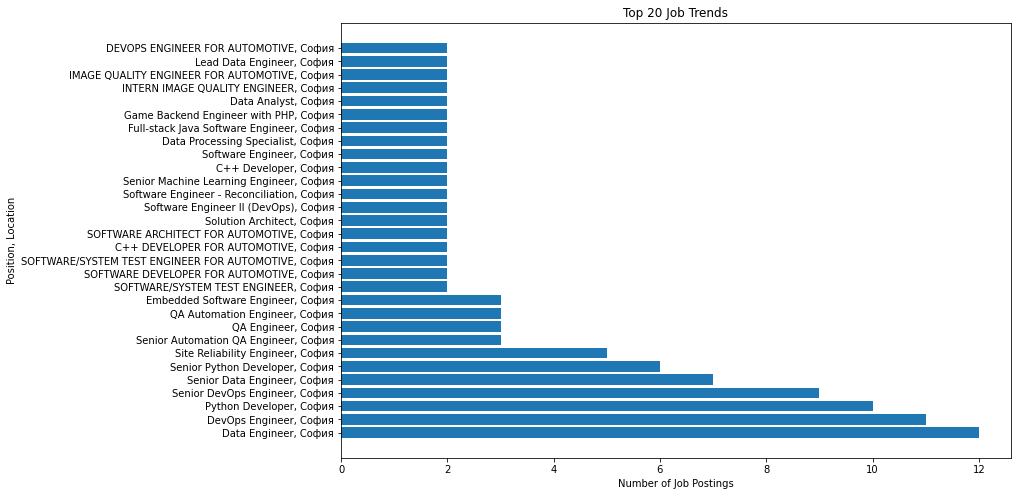

In [49]:
# Plot a horizontal bar chart of the top 20 job trends
plt.figure(figsize=(12, 8))
plt.barh(job_trends.head(30)['position'] + ', ' + job_trends.head(30)['location'], job_trends.head(30)['count'])
plt.title('Top 20 Job Trends')
plt.xlabel('Number of Job Postings')
plt.ylabel('Position, Location')
plt.show()

## Company Analysis by number of employees and date of establishment

In [50]:
# Identify any rows with non-numeric values in the 'number_of_employees' column
non_numeric_rows = df[pd.isna(df['number_of_employees'])]
non_numeric_rows_it = df[pd.isna(df['number_IT_employees'])]

In [51]:
# Group the job postings by company and calculate the average number of employees, average number of IT employees, and minimum establishment year for each company
company_analysis = df.groupby('company_name').agg({'number_of_employees': 'mean', 'number_IT_employees': 'mean', 'established': 'min'})
# Sort the companies by number of IT employees in descending order
company_analysis = company_analysis.sort_values('number_of_employees', ascending=False)
company_analysis.head(30)

,number_of_employees,number_IT_employees,established
company_name,,,
BIC Services Sofia EOOD,13000.0,0.0,1950-01-01
DXC Technology / DXC Bulgaria EOOD,4000.0,3700.0,2017-01-01
А1 България ЕАД,3600.0,300.0,1994-01-01
UniCredit Bulbank AD,3400.0,260.0,1994-01-01
VMware Bulgaria,1700.0,0.0,2007-01-01
ГЕЙМПРОМ ООД,1500.0,30.0,2006-01-01
Paysafe Bulgaria EOOD,1400.0,370.0,2000-01-01
SAP Labs Bulgaria Ltd.,1400.0,0.0,2000-01-01
Tide Platform Bulgaria,1365.0,0.0,2018-01-01


## Analyze job requirements and skills

In [52]:
# Split the 'skills_list' column into a list of skills
skills_list_df = df['skills_list'].apply(lambda x: [i.strip() for i in x.strip("[]").split(",")]).apply(pd.Series).stack().reset_index(level=0).rename(columns={0: 'skill'})

# Split the 'skills_no_img' column into a list of skills
skills_no_img_df = df['skills_no_img'].str.split(',', expand=True).stack().reset_index(level=0).rename(columns={0: 'skill'})

# Combine the 'skills_list' and 'skills_no_img' DataFrames into a single DataFrame
skills_df = pd.concat([skills_list_df, skills_no_img_df], ignore_index=True)
skills_df['skill'] = skills_df['skill'].str.strip()

# Group the skills by skill name and count the number of times each skill appears
skills_analysis_list = skills_list_df.groupby('skill').size().reset_index(name='count')
skills_analysis_no_img = skills_no_img_df.groupby('skill').size().reset_index(name='count')

# Sort the skills by count in descending order
skills_analysis_list = skills_analysis_list.sort_values('count', ascending=False)
skills_analysis_no_img = skills_analysis_no_img.sort_values('count', ascending=False)

print("Top 20 skills in 'skills_list':")
print(skills_analysis_list.head(20))
print("\nTop 20 skills in 'skills_no_img':")
print(skills_analysis_no_img.head(20))

Top 20 skills in 'skills_list':
         skill  count
39      Python     88
54   Английски     56
1          AWS     38
27       Linux     37
8        C/C++     35
21        Java     35
44         SQL     35
6        Azure     16
46    Selenium     15
34         PHP      7
53     Windows      7
47       Spark      7
52      VMware      6
26  Kubernetes      6
4      Ansible      5
7           C#      5
23     Jenkins      5
35        Perl      4
50   Terraform      4
18    HTML/CSS      3

Top 20 skills in 'skills_no_img':
                 skill  count
0                         217
23       Shell Scripts    103
9                  ETL     42
18             Routing     17
7   Data Visualization     16
3                   BI      8
14               JUnit      7
24           Switching      7
19                SIEM      7
8       Data Warehouse      7
10        Firewall/WAF      6
13                ITIL      5
16              PL/SQL      4
17          Pentesting      4
26                 UM

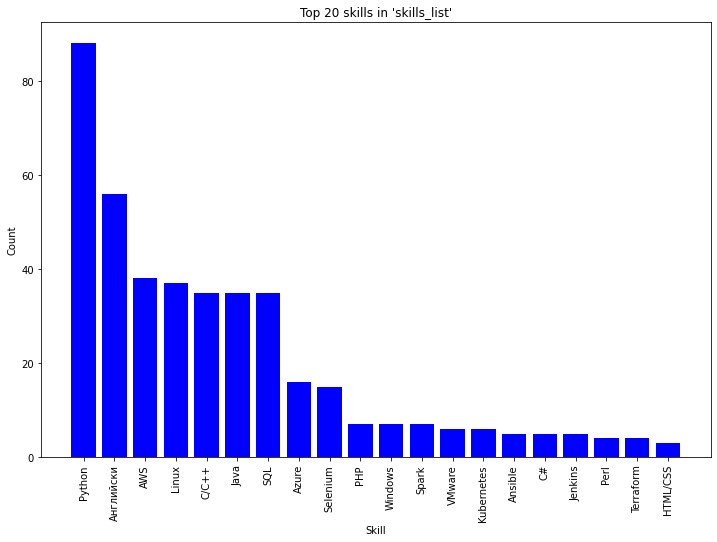

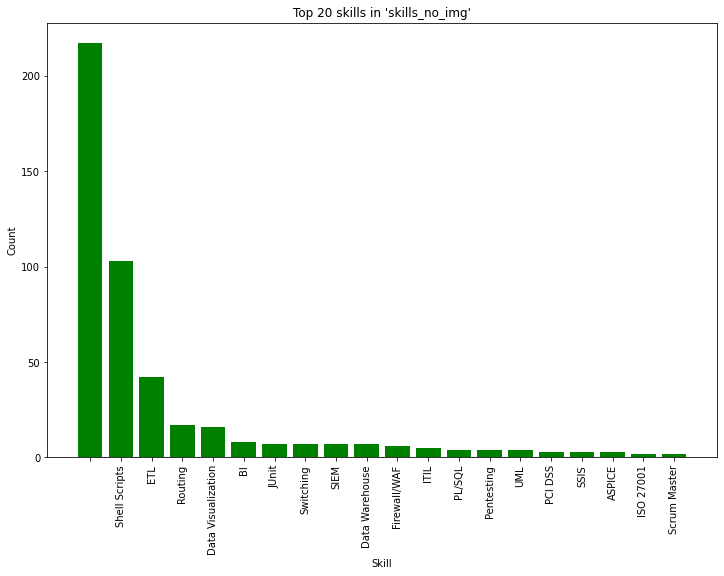

In [53]:
# Plot a bar chart for the top 20 skills in 'skills_list'
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(skills_analysis_list['skill'].head(20), skills_analysis_list['count'].head(20), color='blue')
ax.set_xlabel('Skill')
ax.set_ylabel('Count')
ax.set_title('Top 20 skills in \'skills_list\'')
plt.xticks(rotation=90)
plt.show()

# Plot a bar chart for the top 20 skills in 'skills_no_img'
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(skills_analysis_no_img['skill'].head(20), skills_analysis_no_img['count'].head(20), color='green')
ax.set_xlabel('Skill')
ax.set_ylabel('Count')
ax.set_title('Top 20 skills in \'skills_no_img\'')
plt.xticks(rotation=90)
plt.show()

## Work From Home Analysis

In [54]:
# Number of job postings that offer work-from-home options
work_from_home_counts = df['work_from_home'].value_counts()

# Percentage of job postings that offer work-from-home options
work_from_home_percent = work_from_home_counts / len(df) * 100

print(f"Number of job postings that offer work from home option:\n{work_from_home_counts}\n")
print(f"Percentage of job postings that offer work from home option:\n{work_from_home_percent}")

Number of job postings that offer work from home option:
Home Office Possible    236
No Answer               208
Online Interview         31
Name: work_from_home, dtype: int64

Percentage of job postings that offer work from home option:
Home Office Possible    49.684211
No Answer               43.789474
Online Interview         6.526316
Name: work_from_home, dtype: float64


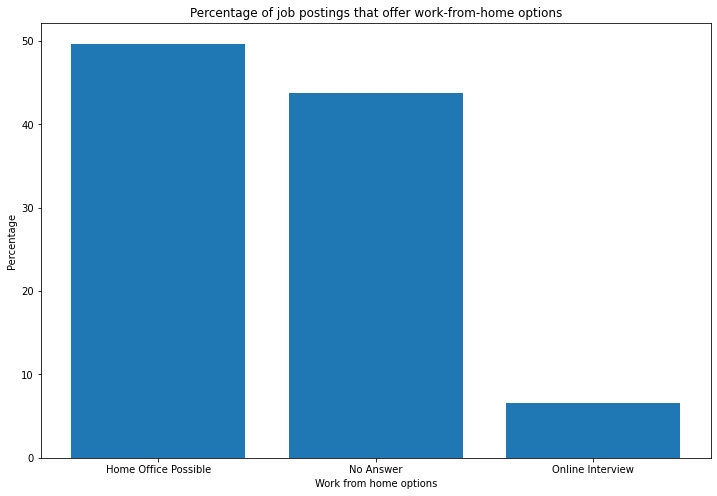

In [55]:
# Visualize the percentage of job postings that offer work-from-home options
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(work_from_home_percent.index, work_from_home_percent.values)
ax.set_title('Percentage of job postings that offer work-from-home options')
ax.set_xlabel('Work from home options')
ax.set_ylabel('Percentage')
plt.show()

## Number of jobs postings by location

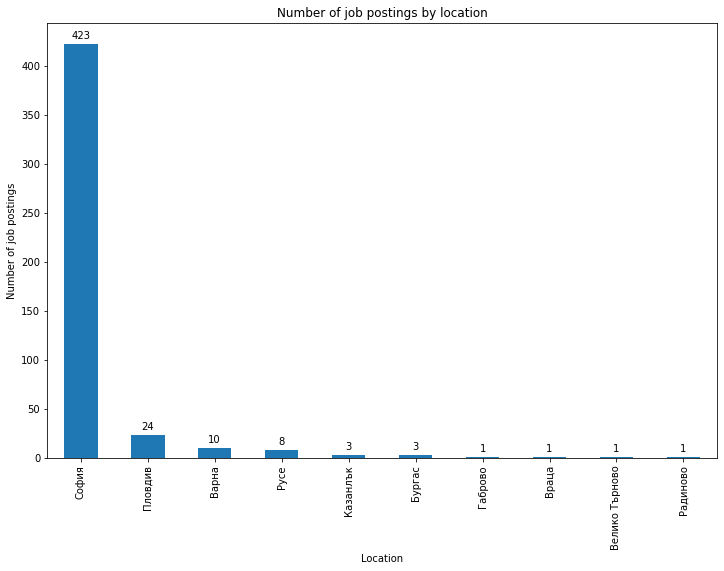

In [56]:
# Count the number of job postings by location
location_counts = df['location'].value_counts()

plt.figure(figsize=(12, 8))

# Create a bar chart of the location counts
ax = location_counts.plot(kind='bar')
plt.title('Number of job postings by location')
plt.xlabel('Location')
plt.ylabel('Number of job postings')

# Add numbers on top of each bar
for i, v in enumerate(location_counts):
    ax.text(i, v+5, str(v), ha='center')

plt.show()

## Number of IT Employees vs number of non IT employees

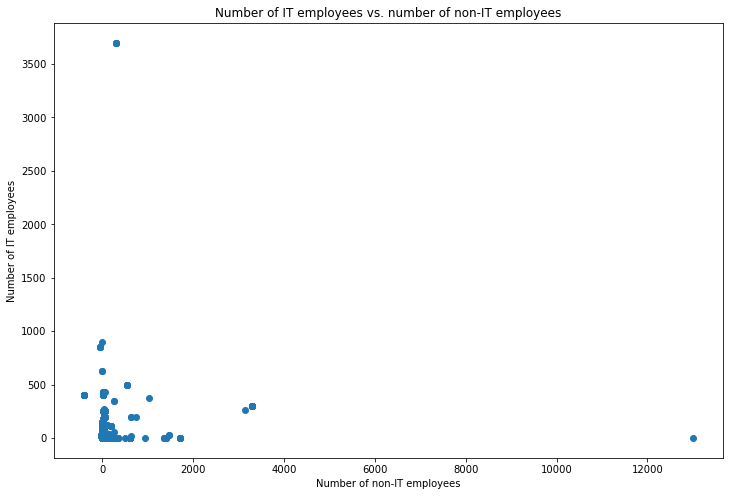

In [57]:
# Create a scatter plot of the number of IT employees vs. the number of non-IT employees
plt.figure(figsize = (12, 8))
df['number_non_IT_employees'] = df['number_of_employees'] - df['number_IT_employees']
plt.scatter(df['number_non_IT_employees'], df['number_IT_employees'])
plt.title('Number of IT employees vs. number of non-IT employees')
plt.xlabel('Number of non-IT employees')
plt.ylabel('Number of IT employees')
plt.show()


### This is relative of course but this result mainly shows that most of the companies are small with not a lot of IT employee

## Distribution of days since job postings were posted 

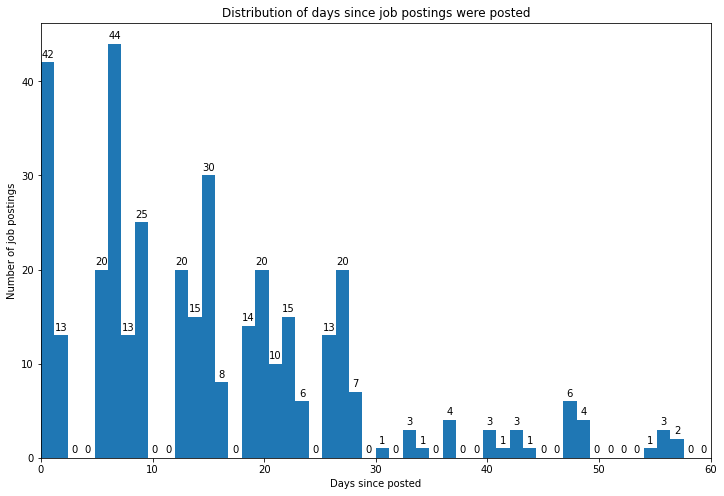

In [58]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Specify the number of bins and the range of x-axis
num_bins = 50  # Adjust this value as needed for more or less granularity
x_min = 0
x_max = 60  # Adjust this value to set the maximum days displayed

# Plot the histogram and get the outputs (n, bins, patches)
n, bins, patches = plt.hist(df['days_since_posted'], bins=num_bins, range=(x_min, x_max))

# Set the title and labels
plt.title('Distribution of days since job postings were posted')
plt.xlabel('Days since posted')
plt.ylabel('Number of job postings')

# Customize the x-axis range
plt.xlim(x_min, x_max)

# Annotate the count on top of each bin
for i in range(len(patches)):
    bin_height = patches[i].get_height()
    plt.annotate(f'{int(bin_height)}', xy=(patches[i].get_x() + patches[i].get_width() / 2, bin_height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Display the plot
plt.show()

### Distribution of companies and year when they were established

In [71]:
df['established'].mean()

Timestamp('1998-05-18 12:31:49.894736896')

/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_68093/3735501345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['company_age'] = current_year - df_filtered['established_year']


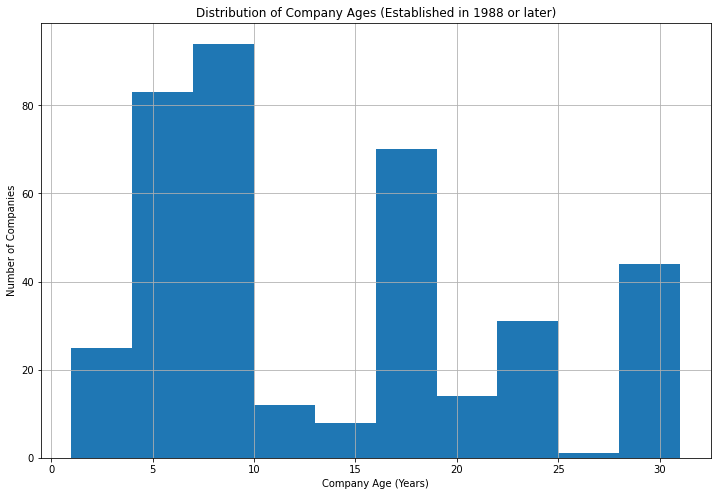

In [72]:
current_year = pd.Timestamp.now().year
df['established_year'] = df['established'].dt.year

# Filter the DataFrame to include only companies established in 1988 or later
df_filtered = df[df['established_year'] >= 1988]

df_filtered['company_age'] = current_year - df_filtered['established_year']

plt.figure(figsize=(12, 8))
df_filtered['company_age'].hist()
plt.title('Distribution of Company Ages (Established in 1988 or later)')
plt.xlabel('Company Age (Years)')
plt.ylabel('Number of Companies')
plt.show()

### Company Size Distribution:

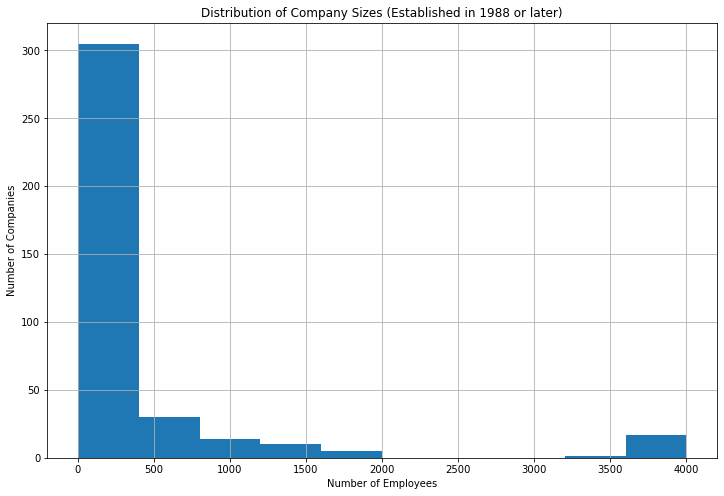

In [74]:
plt.figure(figsize=(12, 8))
df_filtered['number_of_employees'].hist()
plt.title('Distribution of Company Sizes (Established in 1988 or later)')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Companies')
plt.show()


### Company Age vs. Company Size: Create a scatter plot to explore the relationship between company age and company size for companies established in 1988 or later.

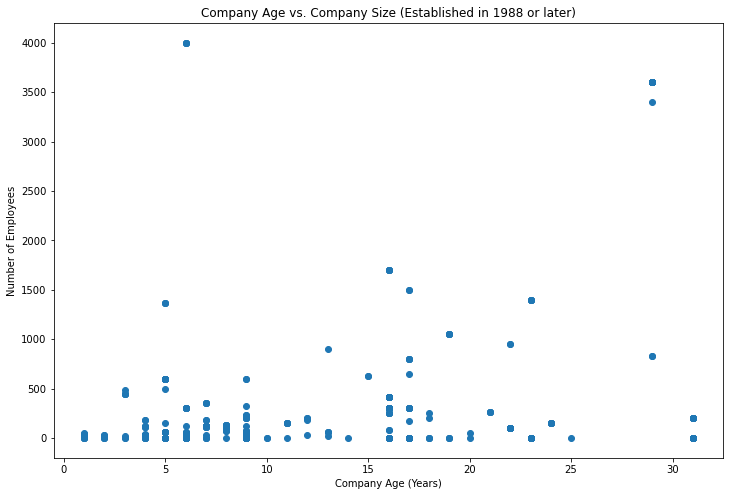

In [76]:
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['company_age'], df_filtered['number_of_employees'])
plt.title('Company Age vs. Company Size (Established in 1988 or later)')
plt.xlabel('Company Age (Years)')
plt.ylabel('Number of Employees')
plt.show()


### Grouping by Age: Group companies established in 1988 or later into age categories (startups, young and mature) 

In [83]:
def age_group(age):
    if age <= 3:
        return 'Startup'
    elif age <= 10:
        return 'Young'
    else:
        return 'Mature'

df_filtered['age_group'] = df_filtered['company_age'].apply(age_group)

grouped_sizes = df_filtered.groupby('age_group')['number_of_employees'].agg(['count', 'mean', 'median', 'min', 'max'])
print(grouped_sizes)


           count        mean  median  min     max
age_group                                        
Mature       178  571.612360   200.0  0.0  3600.0
Startup       25  105.640000    30.0  0.0   490.0
Young        179  214.944134    60.0  0.0  4000.0


/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_68093/898971437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = df_filtered['company_age'].apply(age_group)


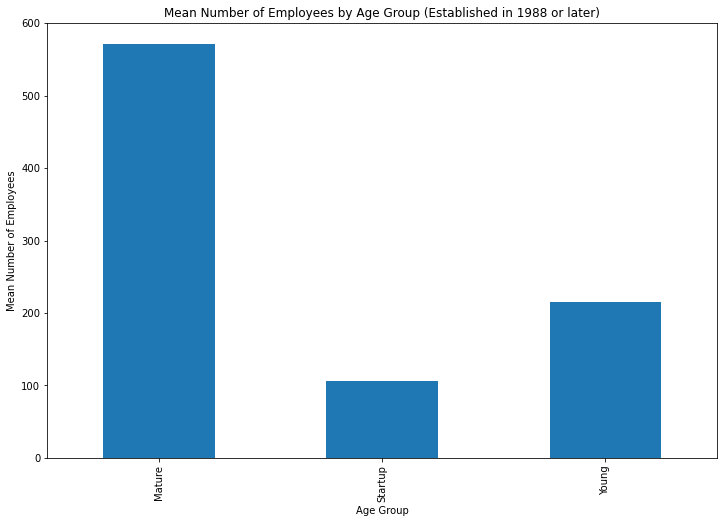

In [85]:
mean_sizes = df_filtered.groupby('age_group')['number_of_employees'].mean()

plt.figure(figsize=(12, 8))
mean_sizes.plot(kind='bar')
plt.title('Mean Number of Employees by Age Group (Established in 1988 or later)')
plt.xlabel('Age Group')
plt.ylabel('Mean Number of Employees')
plt.show()

# We can conclude that mature companies typically have more employees